# 1. Data Loading

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, r2_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading The Data
df = pd.read_csv("../Datasets/bank-full.csv",sep=";")
original_df = df.copy()

In [3]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (45211, 17)

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Dataset information
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Basic statistics
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Descriptive statistics:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# 2. Data Pre-Processing

In [6]:
# Checking Duplicate Records
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Droping NA Rows
df.dropna(inplace=True)

In [8]:
# Category Columns and Numeric Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("\nCategorical columns:", categorical_cols)

# For categorical columns, let's see unique values
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Unique values in categorical columns:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [9]:
# Verify normalization
print("\nBefore encoding:")
display(df.head())

# Label Encoding for categorical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformations
print("\nAfter encoding:")
display(df.head())


Before encoding:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



After encoding:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [10]:
# We'll normalize all numerical features except the target (G3)
features_to_normalize = [col for col in numerical_cols if col != 'y']

# Verify normalization
print("\nBefore normalization:")
display(df[features_to_normalize].describe())

scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Verify normalization
print("\nAfter normalization:")
display(df[features_to_normalize].describe())


Before normalization:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



After normalization:


,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,1.257292e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


# 3. Exploratory Data Analysis (EDA)

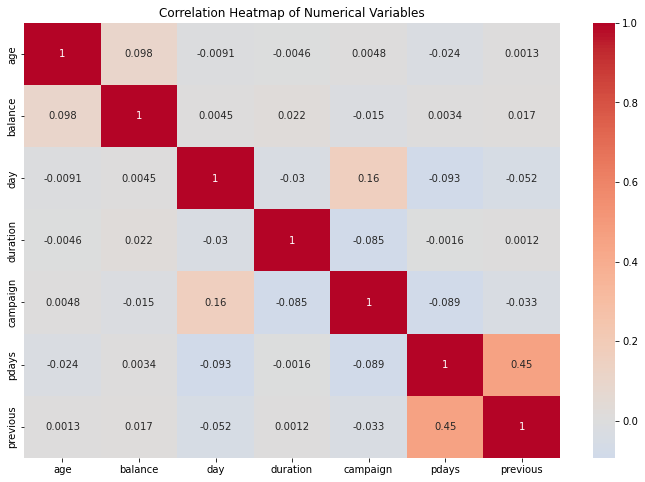

In [11]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

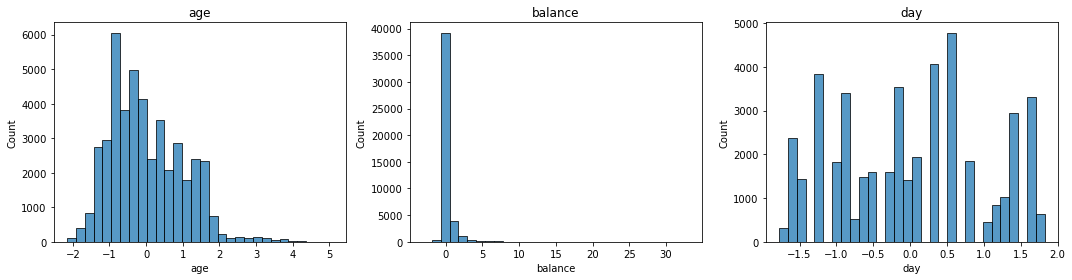

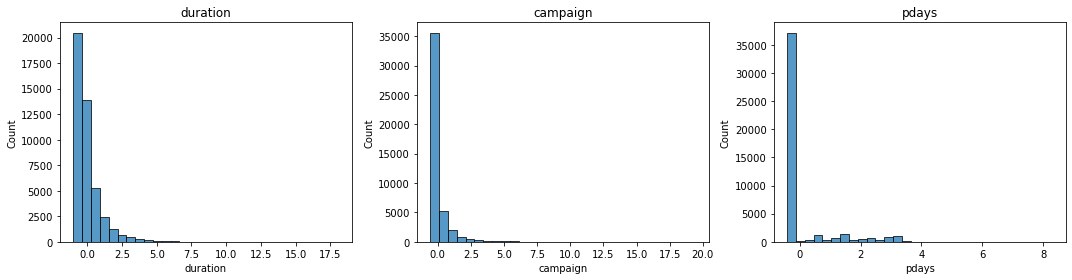

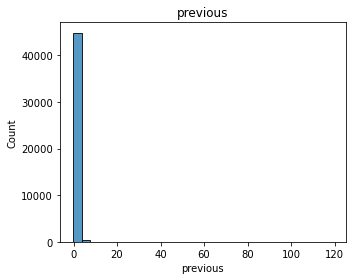

In [12]:
plots_per_row = 3

for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))

    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.histplot(data=df, x=column, bins=30, ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    # plt.show()

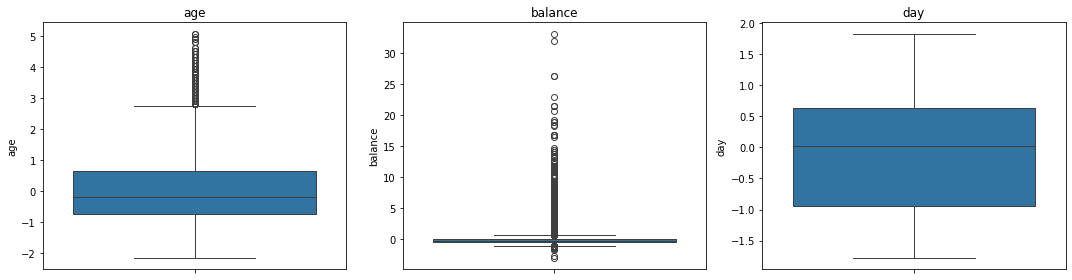

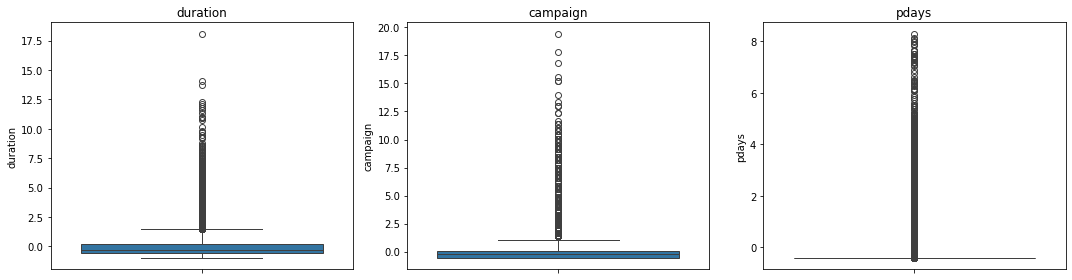

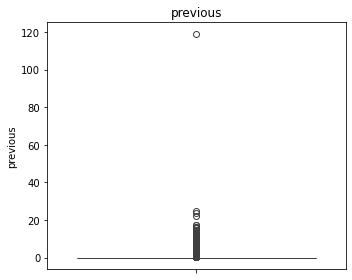

In [13]:
plots_per_row = 3

for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
    
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

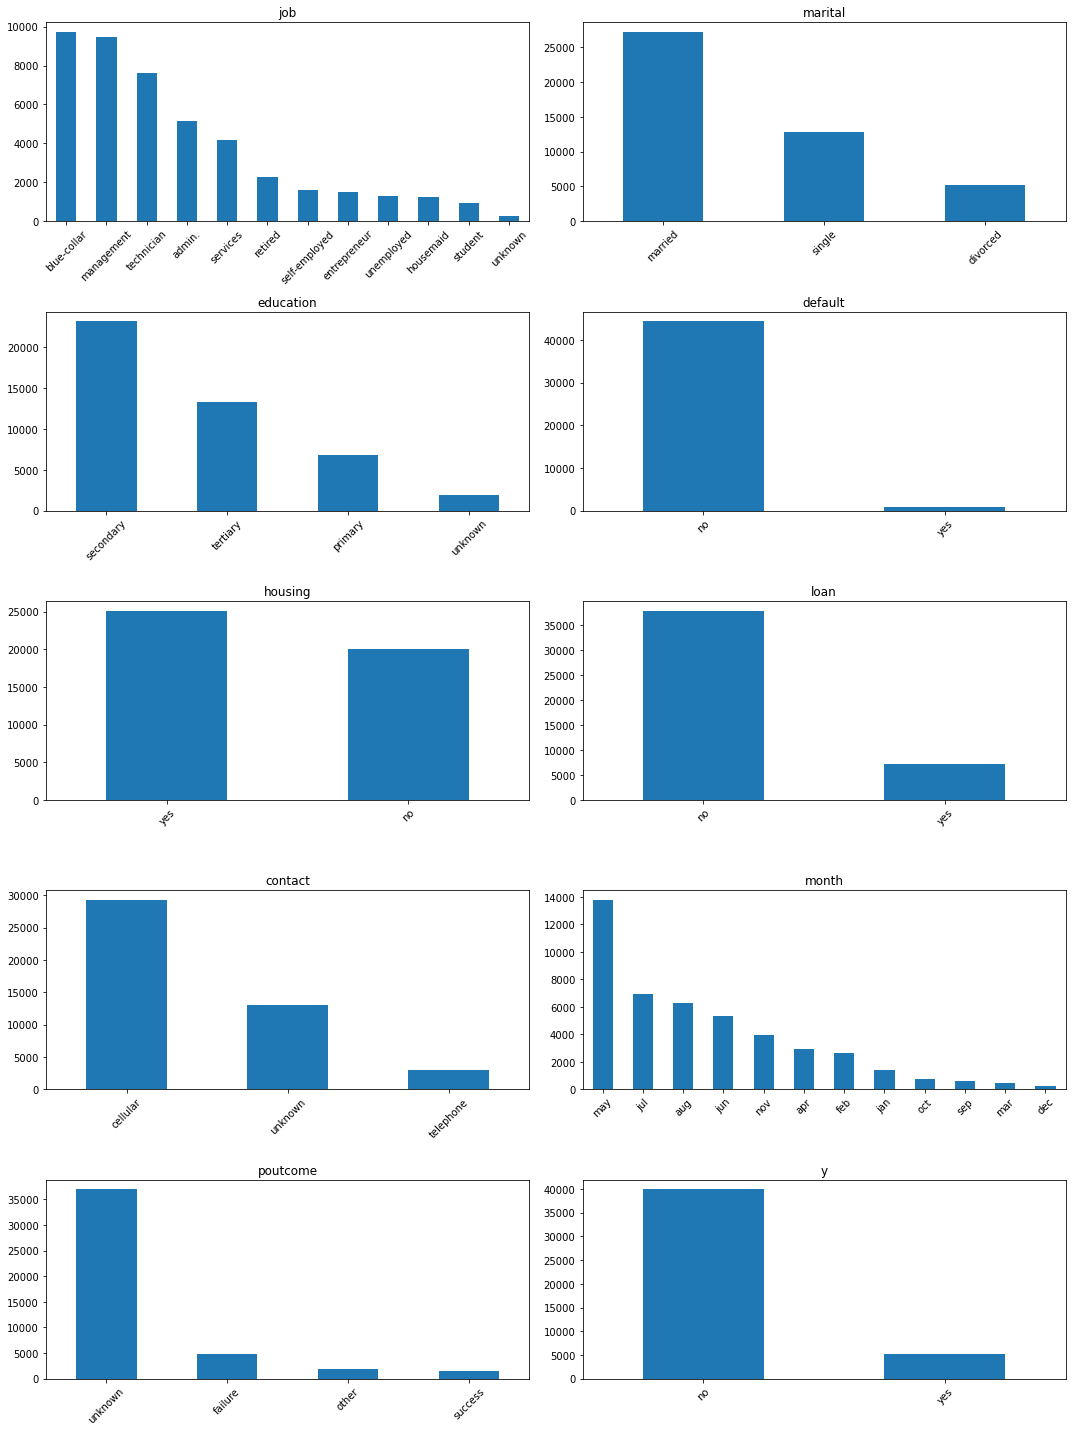

In [14]:
# Check class imbalance in categorical features
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    original_df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

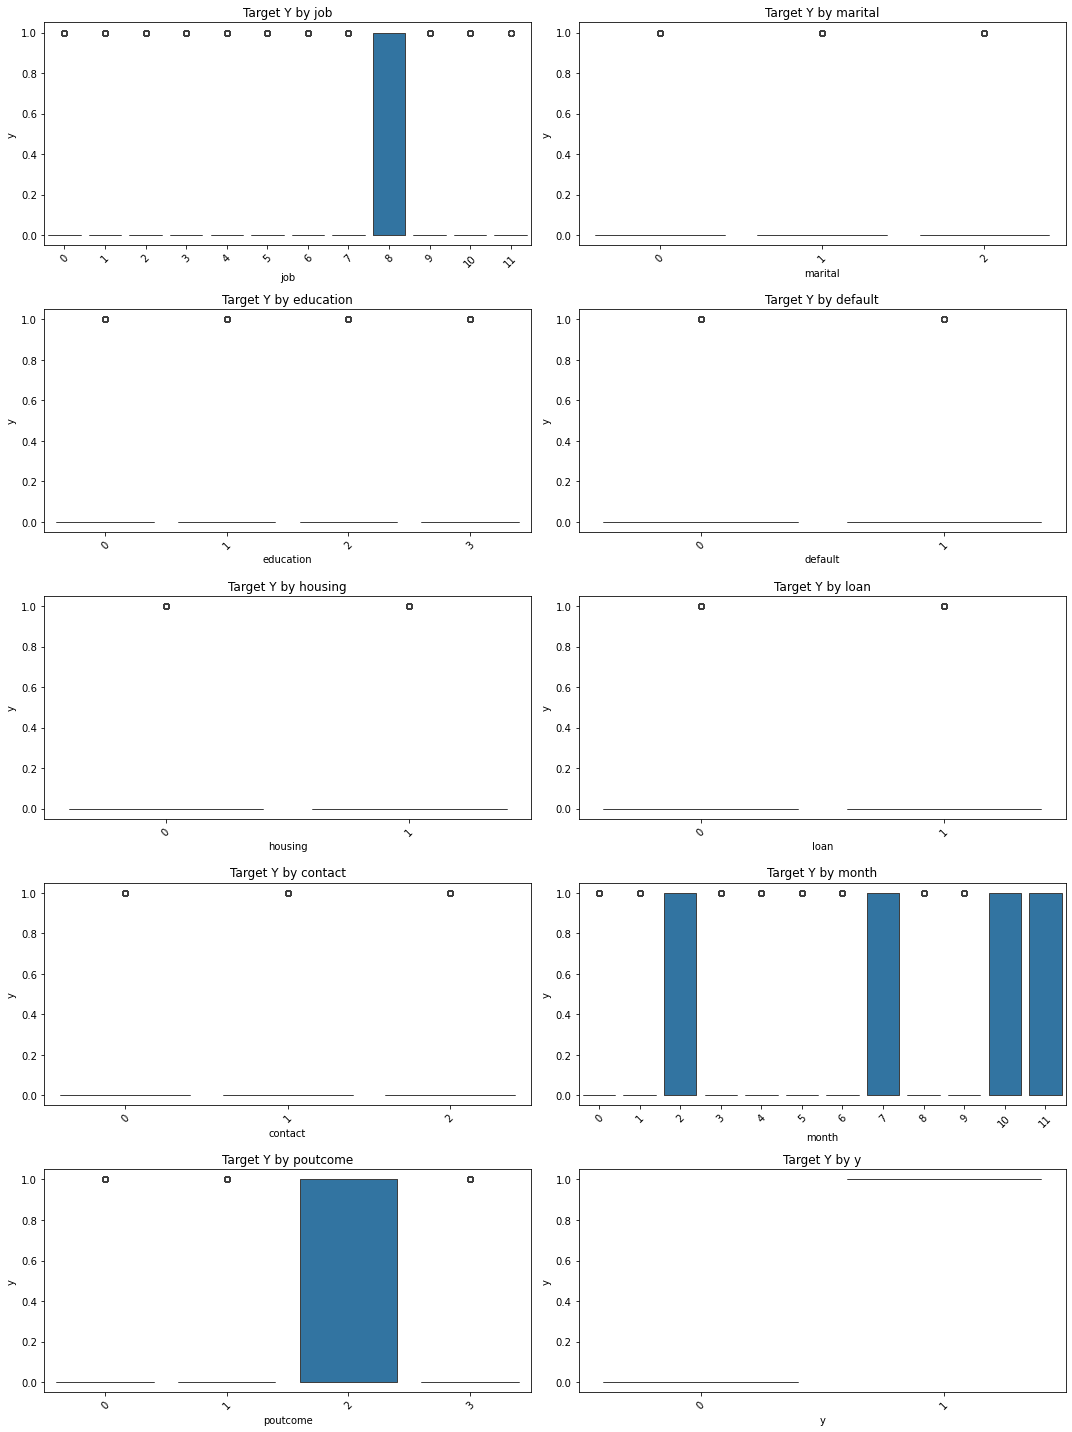

In [15]:
# Boxplots for categorical variables vs y
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):  # Plot first 10 for brevity
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=col, y='y', data=df)
    plt.title(f'Target Y by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Checking Outliers
outlier_columns = numerical_cols[:]

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers for {column} : {len(outliers)} / {len(df)} ({len(outliers)/len(df):.1%})")

Outliers for age : 487 / 45211 (1.1%)
Outliers for balance : 4729 / 45211 (10.5%)
Outliers for day : 0 / 45211 (0.0%)
Outliers for duration : 3247 / 45211 (7.2%)
Outliers for campaign : 3064 / 45211 (6.8%)
Outliers for pdays : 8257 / 45211 (18.3%)
Outliers for previous : 8257 / 45211 (18.3%)


In [17]:
# Winsorization (Handling Outliers)
winsorize_columns = numerical_cols[:]

def winsorize_iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return series.clip(lower, upper)

df[winsorize_columns] = df[winsorize_columns].apply(winsorize_iqr)
df[winsorize_columns].head(10)

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194
5,-0.559037,-0.371551,-1.298476,-0.462724,-0.569351,-0.411453,-0.25194
6,-1.218254,-0.300608,-1.298476,-0.159841,-0.569351,-0.411453,-0.25194
7,0.100181,-0.446762,-1.298476,0.473107,-0.569351,-0.411453,-0.25194
8,1.606965,-0.407679,-1.298476,-0.808322,-0.569351,-0.411453,-0.25194
9,0.194355,-0.252657,-1.298476,-0.788906,-0.569351,-0.411453,-0.25194


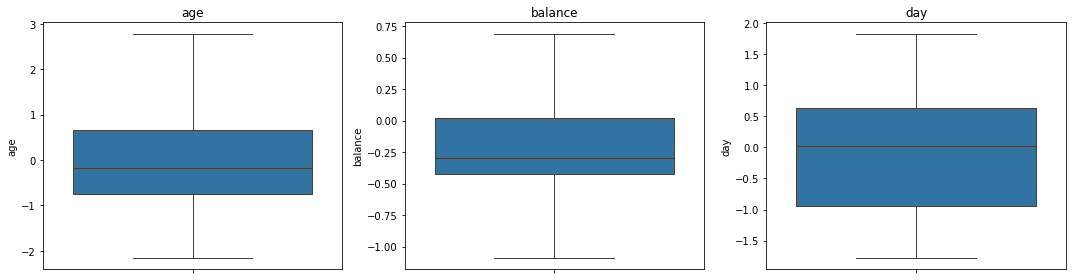

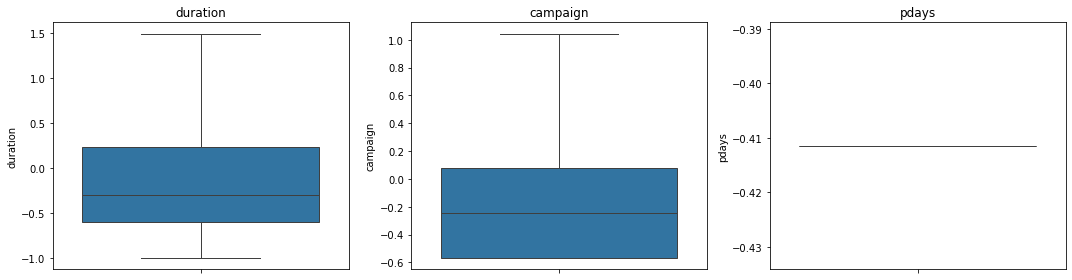

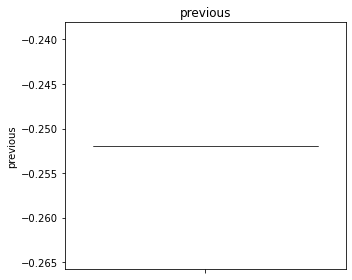

In [18]:
# Checking data after Winsorization
plots_per_row = 3

# Loop through columns in chunks of 3
for i in range(0, len(numerical_cols), plots_per_row):
    subset = numerical_cols[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
    
    # If only one plot in this row, axes is not iterable, so make it a list
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

In [19]:
df.drop(columns=['previous', 'pdays'], axis=1, inplace=True)

# 4. Data Selection for Modeling

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,3,0


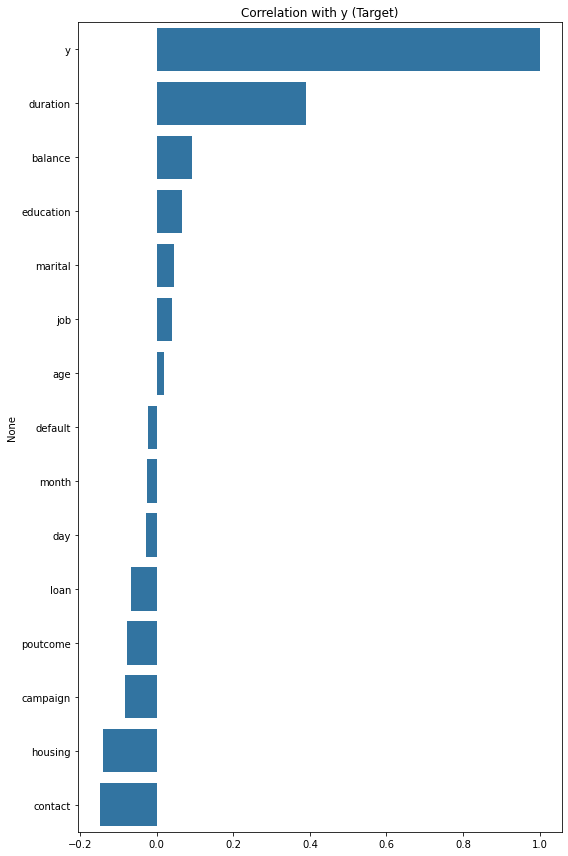

Selected features based on correlation:
['duration', 'housing', 'contact']


In [21]:
# Calculate correlations with target y
corr_with_target = df.corr()['y'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(y=corr_with_target.index, x=corr_with_target.values)
plt.title('Correlation with y (Target)')
plt.tight_layout()
plt.show()

# Let's select features with correlation > 0.1 or < -0.1 (absolute value)
selected_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()
selected_features.remove('y')  # Remove target variable

print("Selected features based on correlation:")
print(selected_features)

In [22]:
# Feature and Target Selection
feature_data = df[selected_features]
target_data = df["y"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data,target_data,test_size=0.4,random_state=42)

target_train.value_counts(), target_test.value_counts()

(0    23938
 1     3188
 Name: y, dtype: int64,
 0    15984
 1     2101
 Name: y, dtype: int64)

# 5. Model Loading & Training

In [23]:
# Linear Regression Model
model = LogisticRegression()
model.fit(feature_train, target_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 6. Model Predicting

In [24]:
# Prediction of Test Data
prediction_data = model.predict(feature_test)

acc = accuracy_score(target_test, prediction_data)
prec = precision_score(target_test, prediction_data) 
rec = recall_score(target_test, prediction_data)
f1 = f1_score(target_test, prediction_data)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(target_test, prediction_data))

conf_matrix = confusion_matrix(target_test, prediction_data)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8838
Precision: 0.50
Recall: 0.16
F1 Score: 0.2472

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15984
           1       0.50      0.16      0.25      2101

    accuracy                           0.88     18085
   macro avg       0.70      0.57      0.59     18085
weighted avg       0.85      0.88      0.86     18085


Confusion Matrix:
[[15639   345]
 [ 1756   345]]


# 🔍 Model Performance Analysis

## 📊 Class Distribution
- **Class 0 (negative class)**: 15,984 samples  
- **Class 1 (positive class)**: 2,101 samples  

---

## ✅ Confusion Matrix Interpretation
- **True Negatives (TN)**: 15,529 — model correctly predicted class 0  
- **False Positives (FP)**: 455 — model incorrectly predicted class 1 for class 0  
- **False Negatives (FN)**: 1,625 — model missed many actual class 1 cases  
- **True Positives (TP)**: 476 — model correctly identified class 1  

---

## 📈 Evaluation Metrics
- **Accuracy**   : 88.50%  
- **Precision**  : 51%  
- **Recall**     : 23%  
- **F1 Score**   : 31.40%  

---

## 📋 Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.91      | 0.97   | 0.94     | 15,984  |
| 1     | 0.51      | 0.23   | 0.31     | 2,101   |
| **Macro Avg** | 0.71 | 0.60 | 0.63 | 18,085 |
| **Weighted Avg** | 0.86 | 0.88 | 0.86 | 18,085 |

---

## 📌 Summary
- The model is **heavily biased toward class 0**, which dominates the dataset.
- It achieves **high overall accuracy** (88.5%), but this is misleading due to the **class imbalance**.
- **Recall for class 1 is just 23%**, meaning it fails to identify most positive cases.
---

# 7. Verification & Reporting

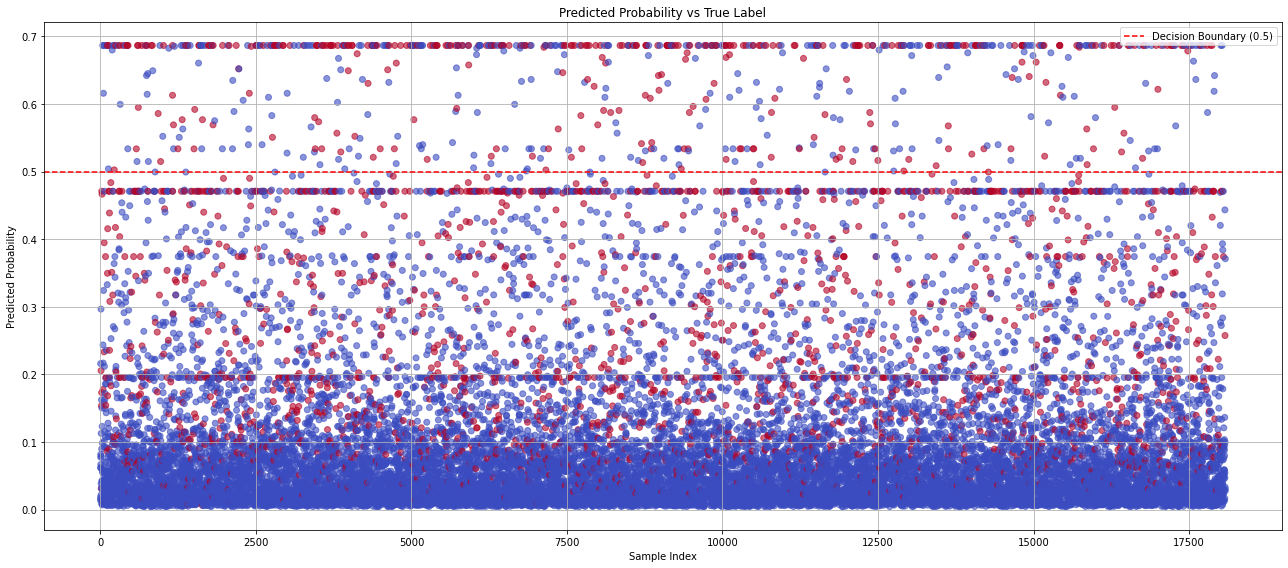

In [25]:
# Get predicted probabilities for test set
y_probs = model.predict_proba(feature_test)[:, 1]

# Plot
plt.figure(figsize=(18, 8))
plt.scatter(range(len(y_probs)), y_probs, c=target_test, cmap='coolwarm', alpha=0.6)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.title("Predicted Probability vs True Label")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

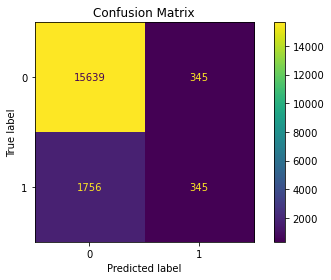

In [26]:
# Confusion matrix
cm = confusion_matrix(target_test, prediction_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


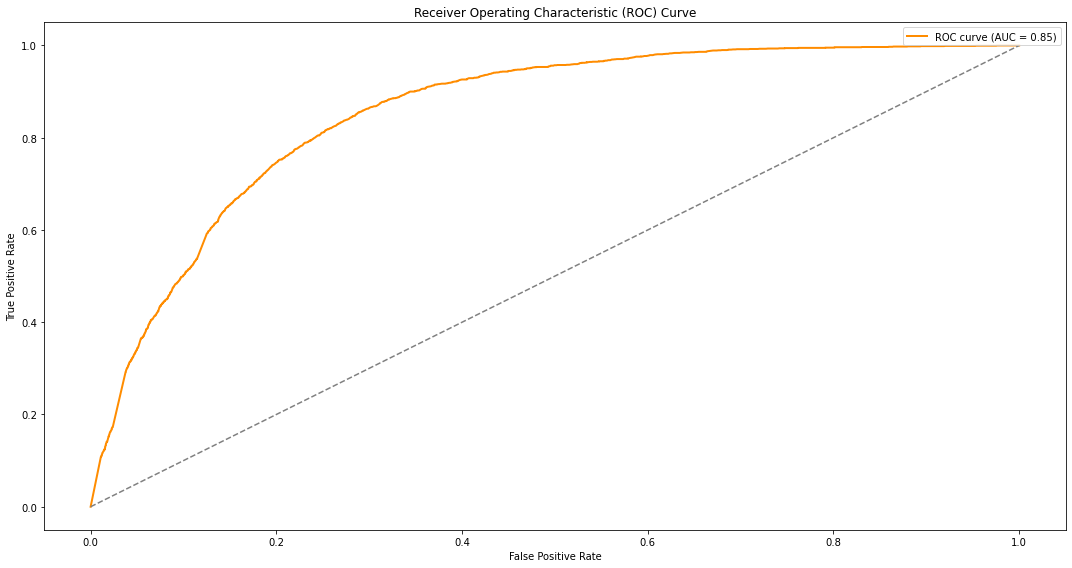

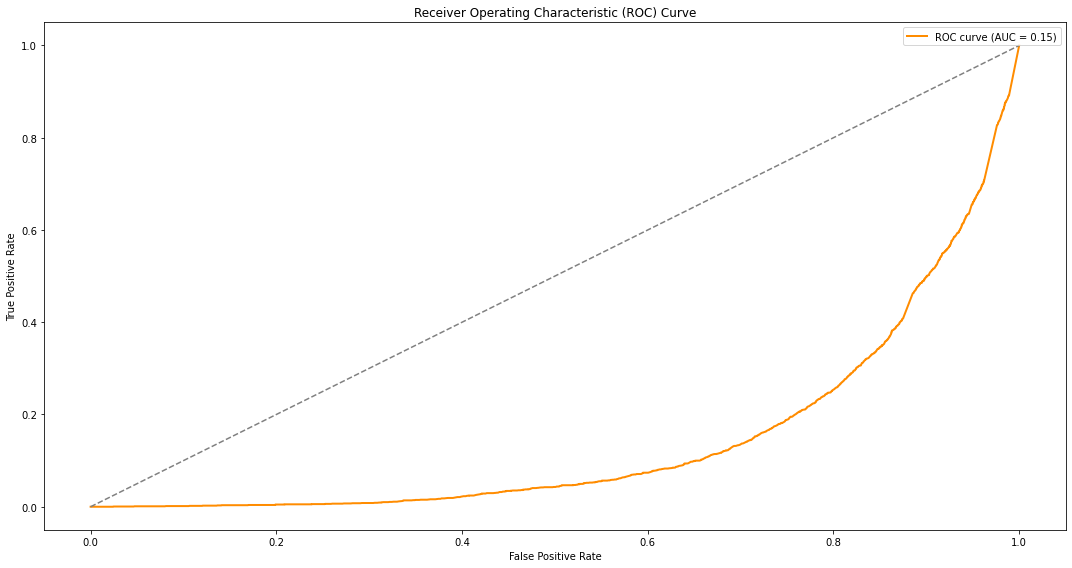

In [27]:
from sklearn.metrics import roc_curve, auc

# Probablitiy Distribution
class_0_probability_prediction = model.predict_proba(feature_test)[:, 0]  # Probability for class 0
class_1_probability_prediction = model.predict_proba(feature_test)[:, 1]  # Probability for class 1

fpr, tpr, thresholds = roc_curve(target_test, class_1_probability_prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(target_test, class_0_probability_prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.tight_layout()
plt.show()


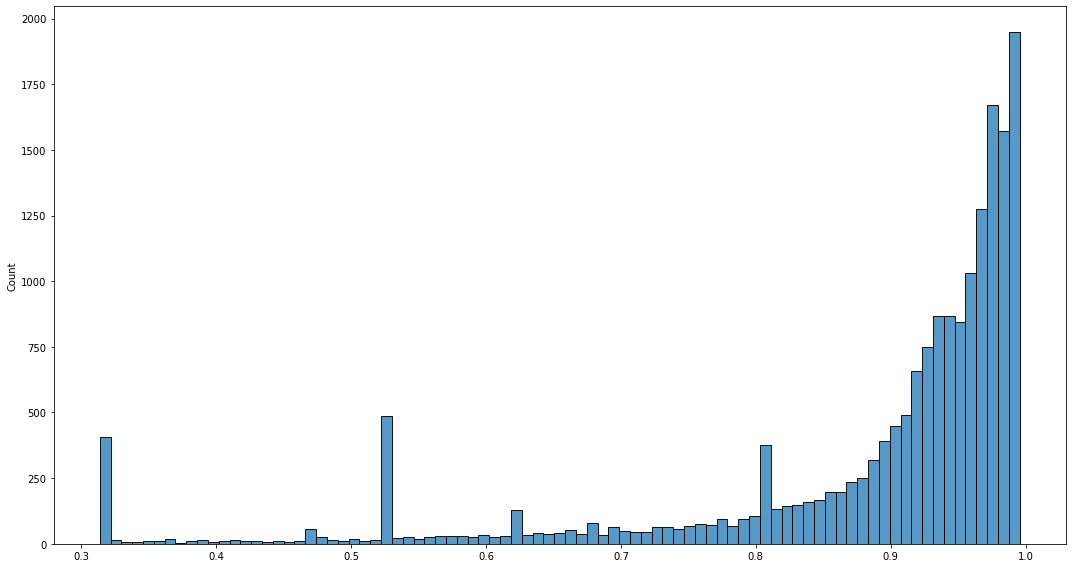

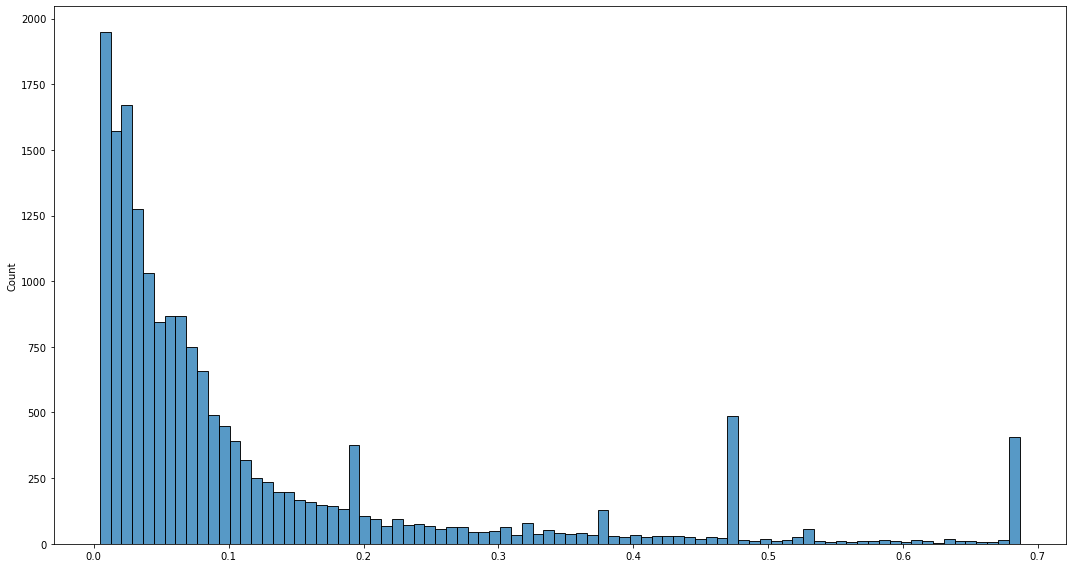

In [28]:
# Probablitiy Distribution
class_0_probability_prediction = model.predict_proba(feature_test)[:, 0]  # Probability for class 0
class_1_probability_prediction = model.predict_proba(feature_test)[:, 1]  # Probability for class 1

plt.figure(figsize=(15,8))
sns.histplot(data=class_0_probability_prediction)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,8))
sns.histplot(data=class_1_probability_prediction)
plt.tight_layout()
plt.show()